# Covid19 Fälle
Plot der Covid19 Fälle in den letzten 30 Tagen mit Aufschlüsselung nach Landkreisen

In [1]:
import pandas as pd
import sqlalchemy as db
# Import Database and select necessary data
engine = db.create_engine('sqlite:///data.db')
conn = engine.connect()


Datenausgabe aus der Datenbank

In [2]:
# Read Cov19 cases seperated by Landkreis, Refdatum, Geschlecht
cov = pd.read_sql_query(
    "SELECT IdLandkreis, sum(AnzahlFall) as Fälle, SUM(AnzahlGenesen) as Genesen, SUM(AnzahlTodesfall) as Todesfall FROM covid c WHERE Refdatum < CURRENT_DATE GROUP BY IdLandkreis;", conn)
# Print result
cov

IdLandkreis  Fälle  Genesen  Todesfall
0           1001   5314     4309         48
1           1002  14275    11079        131
2           1003  13530    10397        119
3           1004   4496     3842         31
4           1051   6108     4332         63
..           ...    ...      ...        ...
406        16073  16857    15759        447
407        16074  12143    10634        186
408        16075  14532    13286        277
409        16076  16257    13800        294
410        16077  14075    12602        382

[411 rows x 4 columns]

Plot

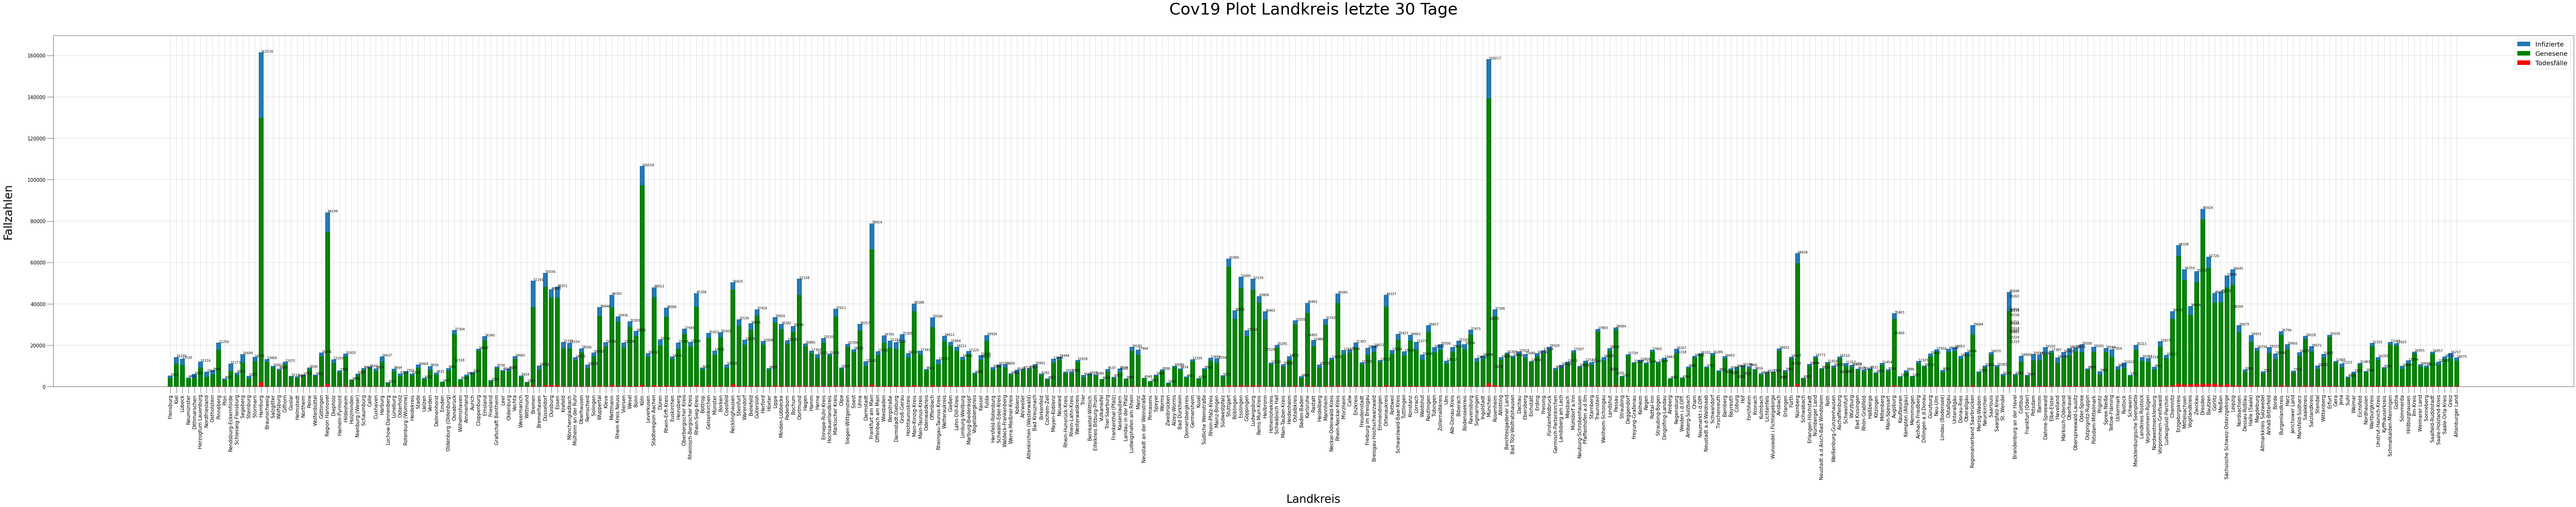

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kreisid import kreisid

re=cov['Genesen']
de=cov['Todesfall']
co=cov['Fälle']
x=list()

for kreis in cov['IdLandkreis']:
    x.append(kreisid(str(kreis)))

plt.figure(figsize=(140,20))
ax=plt.axes()
  
#ax.set_facecolor('black')
ax.grid(linewidth=0.4, color='#8f8f8f')
  
  
plt.xticks(rotation='vertical',
           size='15')#ticks of X
  
plt.yticks(size='15',color='black')
  
  
ax.set_xlabel('\nLandkreis',size=35, color='black')
ax.set_ylabel('Fallzahlen\n',size=35, color='black')

plt.tick_params(size=20,color='black')
  
  
ax.set_title('Cov19 Plot Landkreis letzte 30 Tage\n',
             size=50,color='black')
  
plt.bar(x,co,label='re')
plt.bar(x,re,label='re',color='green')
plt.bar(x,de,label='re',color='red')
  
for i,j in zip(x,co):
    ax.annotate(str(int(j)),
                xy=(i,j+3),
                color='black',
                size=10)
  
plt.legend(['Infizierte','Genesene','Todesfälle'],
           fontsize=20)

## ICU Plot

### ICU Belegung nach Bundesland

In [3]:
# Read Cov19 cases seperated by Landkreis, Refdatum, Geschlecht
betten = pd.read_sql_query(
    "SELECT datum, bundesland, sum(betten_frei) as frei, sum(betten_belegt) as belegt FROM fallzahlen f GROUP BY bundesland, datum;", conn)
# Print result
betten

datum  bundesland  frei  belegt
0      2020-04-24           1   499     565
1      2020-04-25           1   506     567
2      2020-04-26           1   527     544
3      2020-04-27           1   523     546
4      2020-04-28           1   521     550
...           ...         ...   ...     ...
10075  2022-01-09          16   152     543
10076  2022-01-10          16   134     560
10077  2022-01-11          16   150     550
10078  2022-01-12          16   146     555
10079  2022-01-13          16   134     569

[10080 rows x 4 columns]

### Plot

/tmp/ipykernel_26963/775978171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot["datum"] = plot["datum"].astype("datetime64")
/tmp/ipykernel_26963/775978171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot["datum"] = plot["datum"].astype("datetime64")
/tmp/ipykernel_26963/775978171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

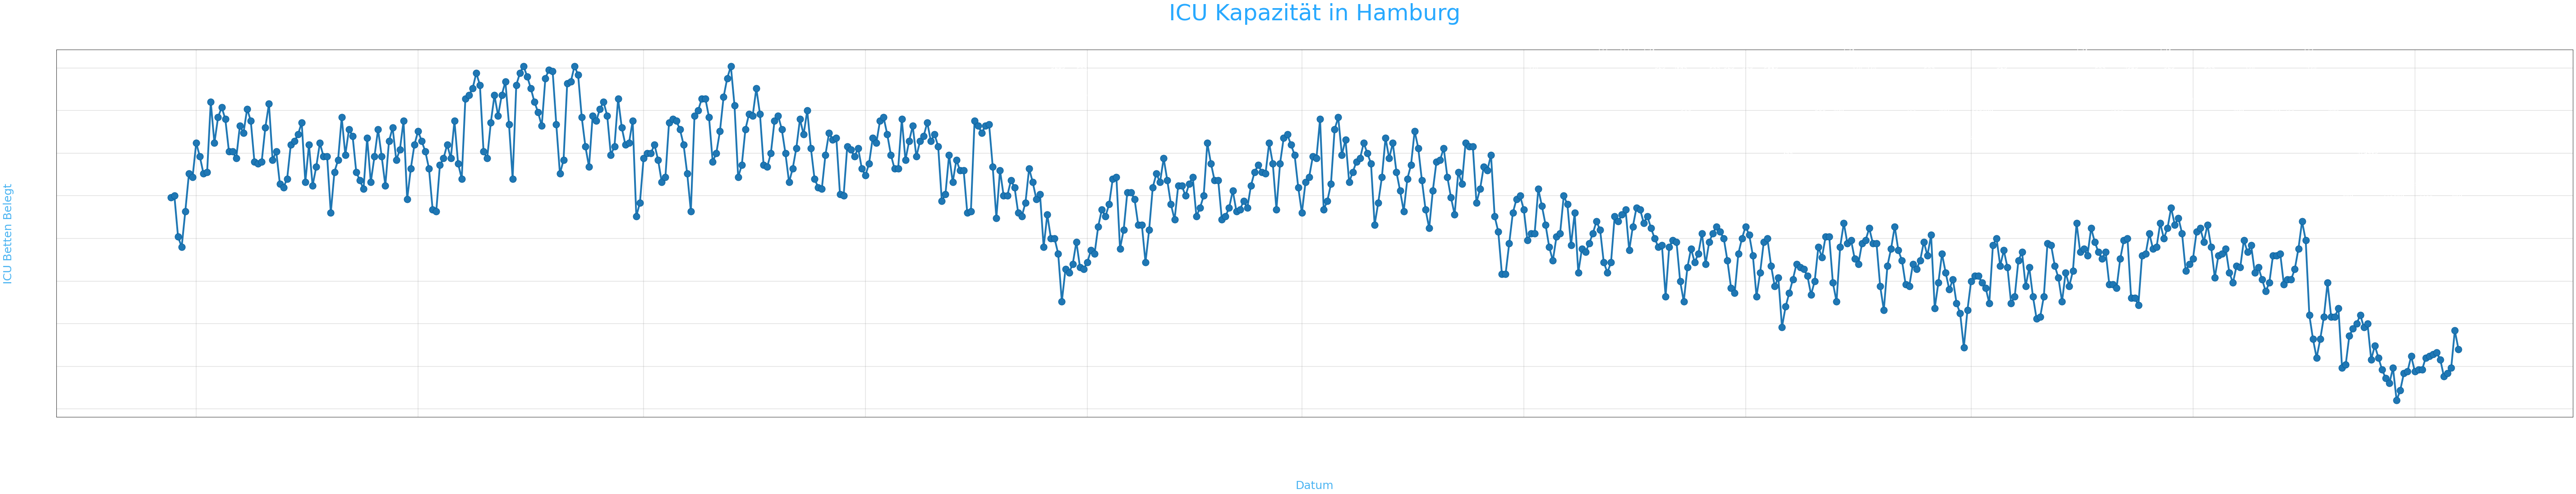

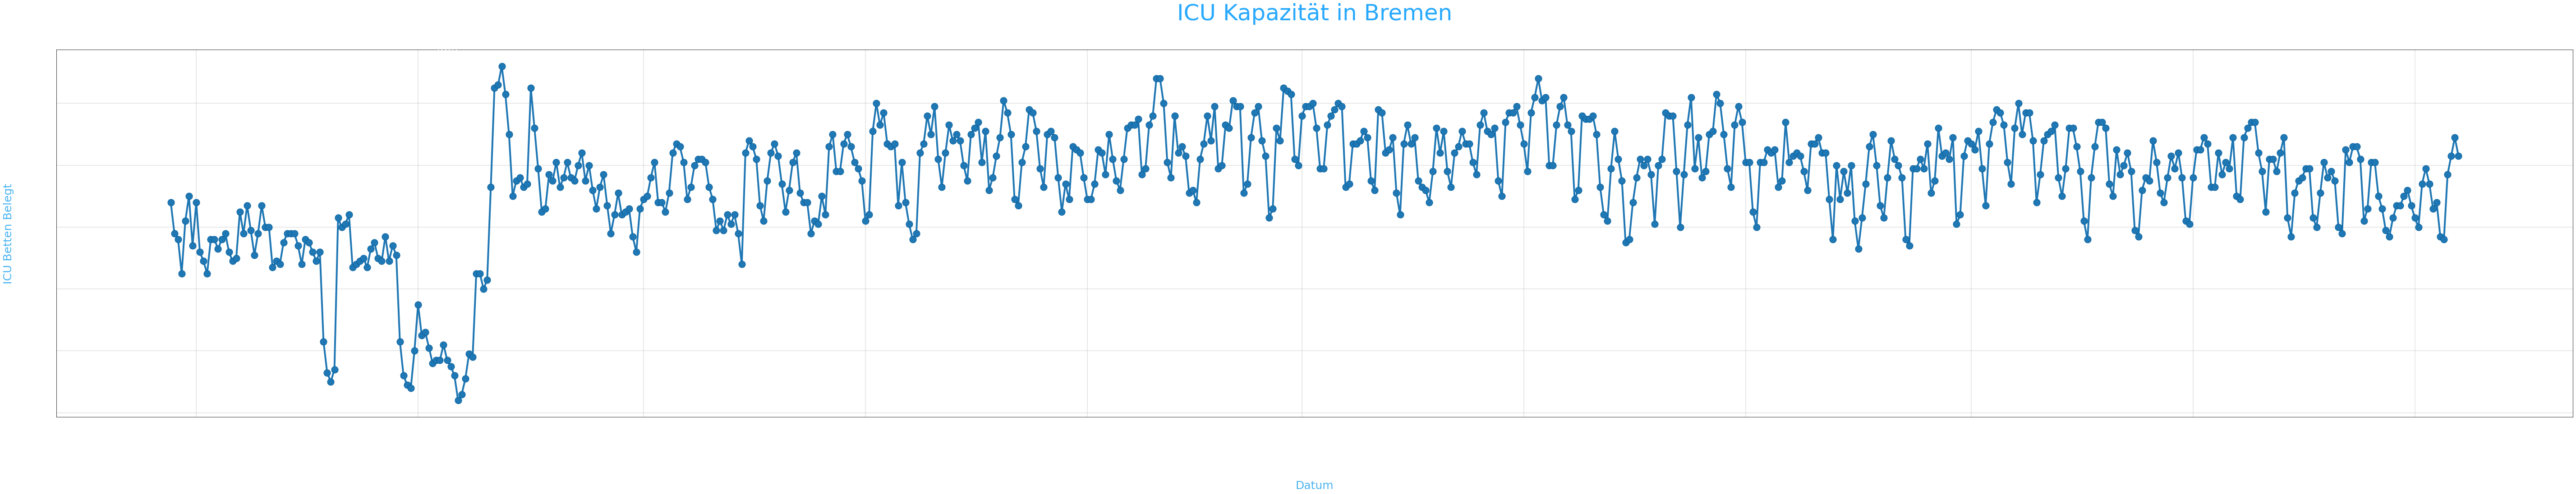

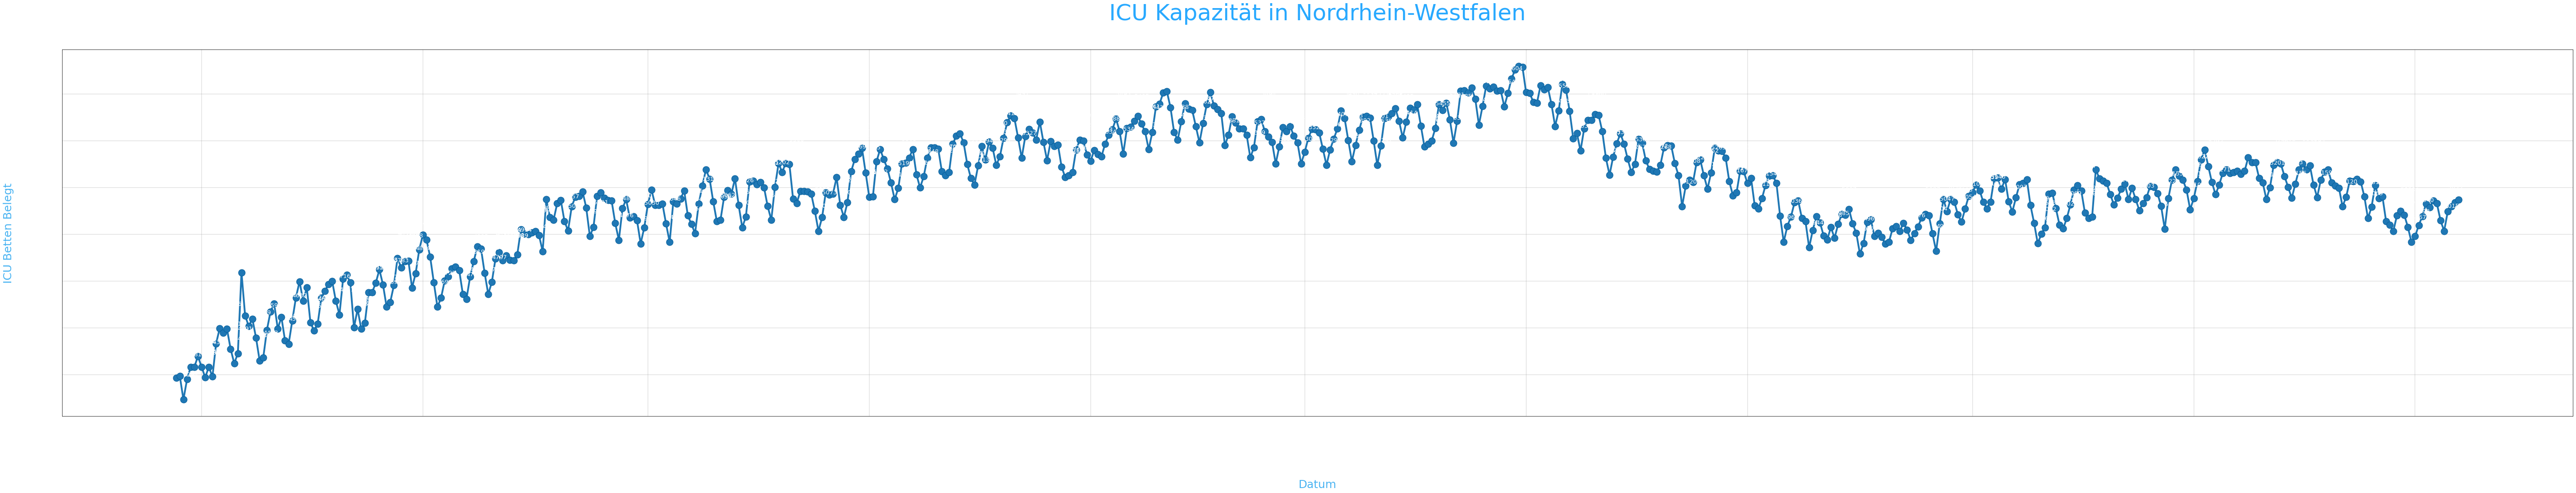

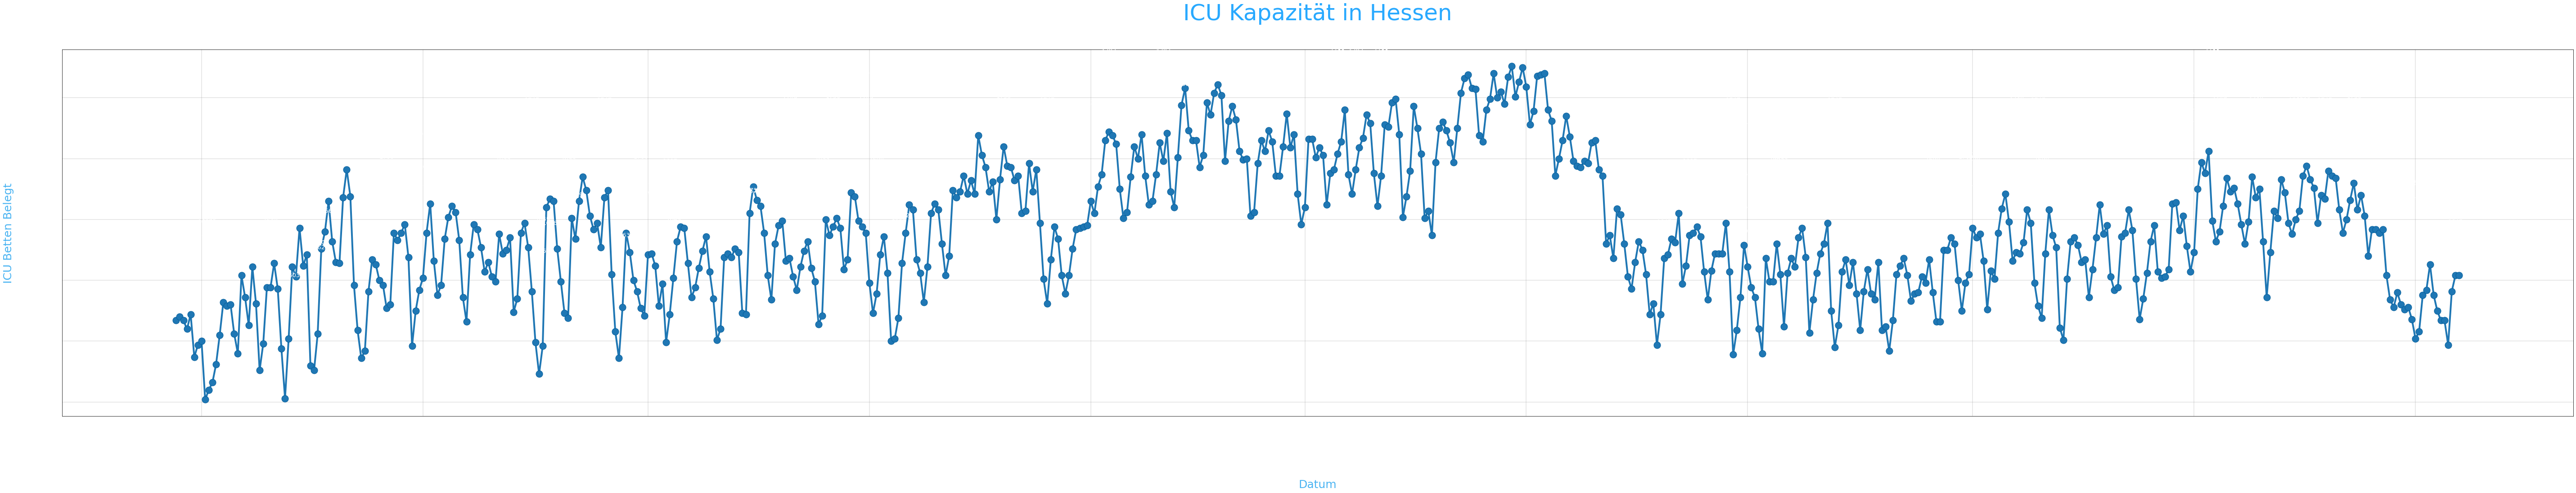

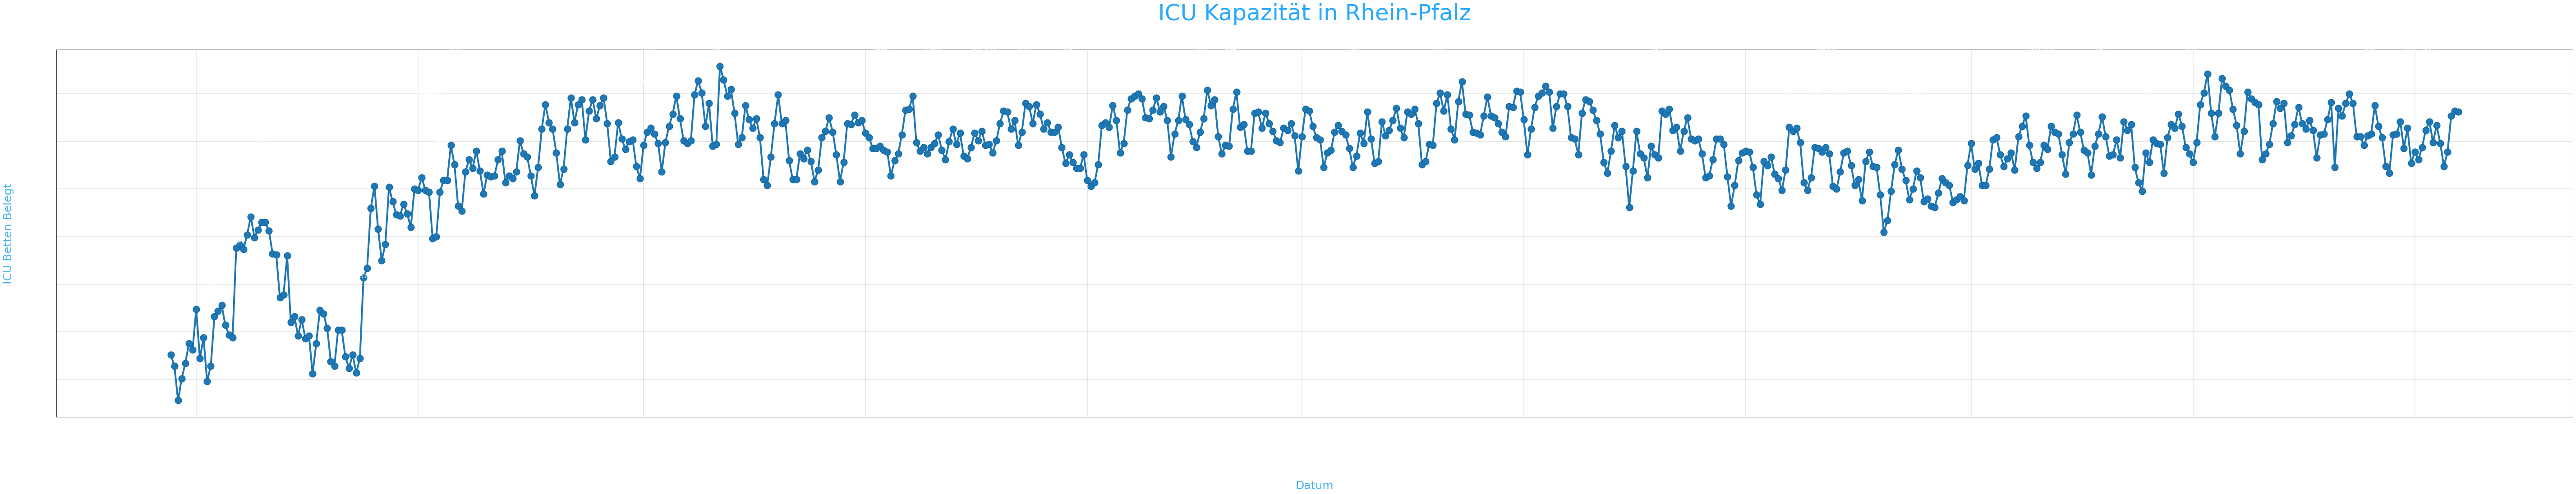

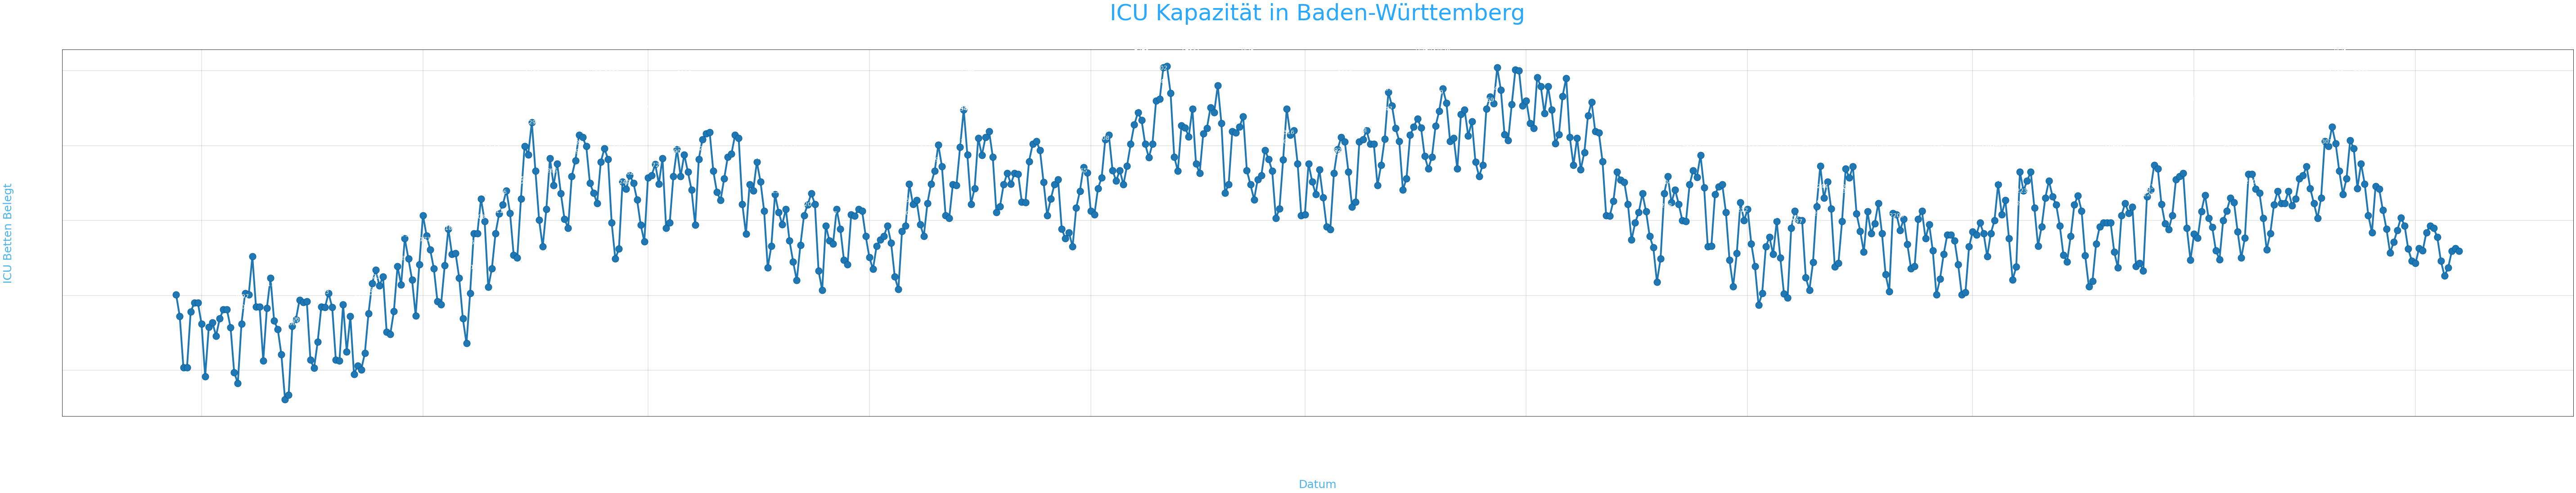

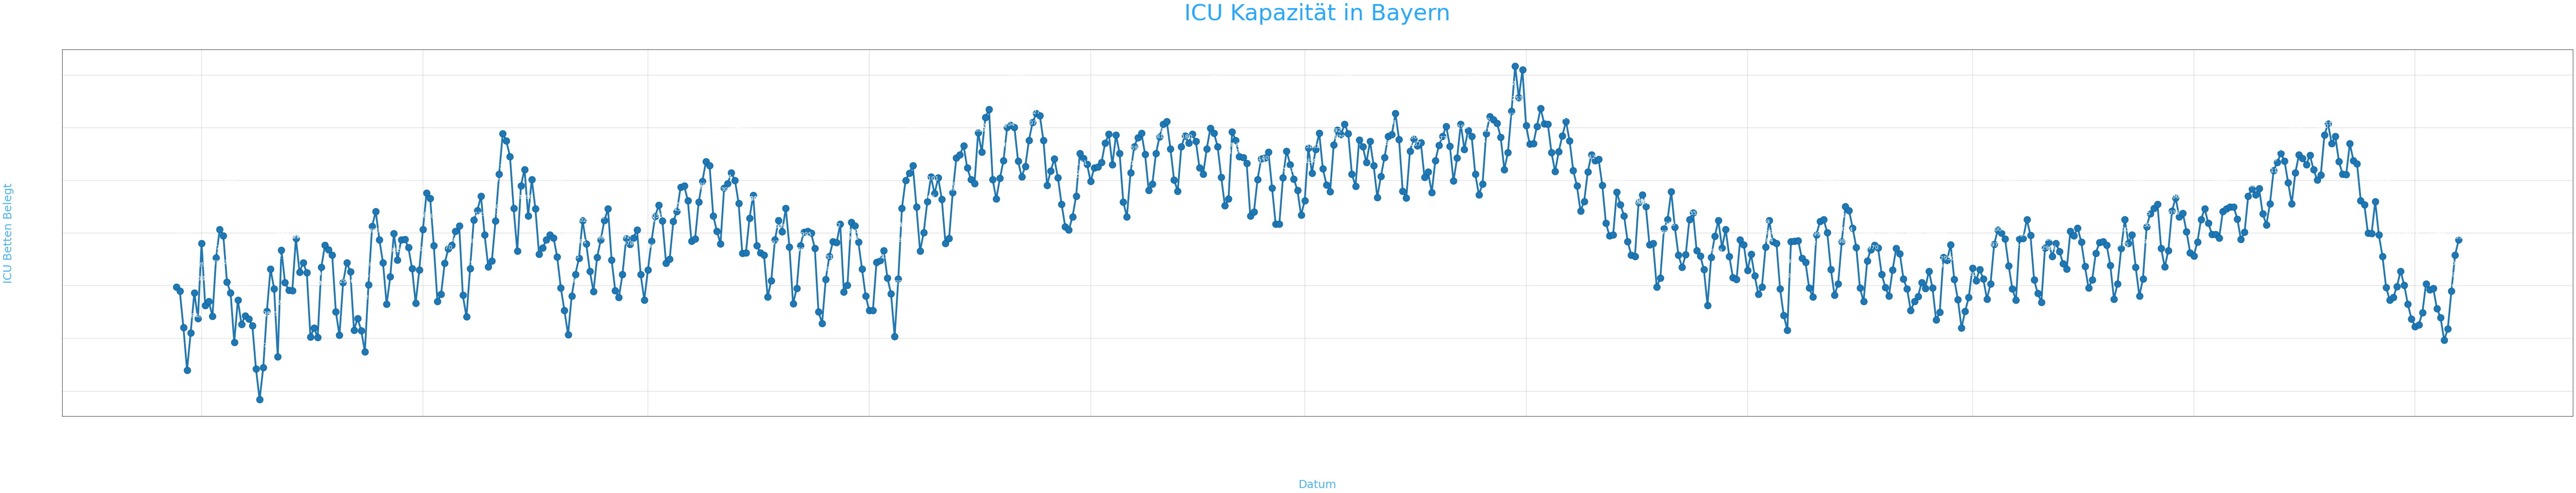

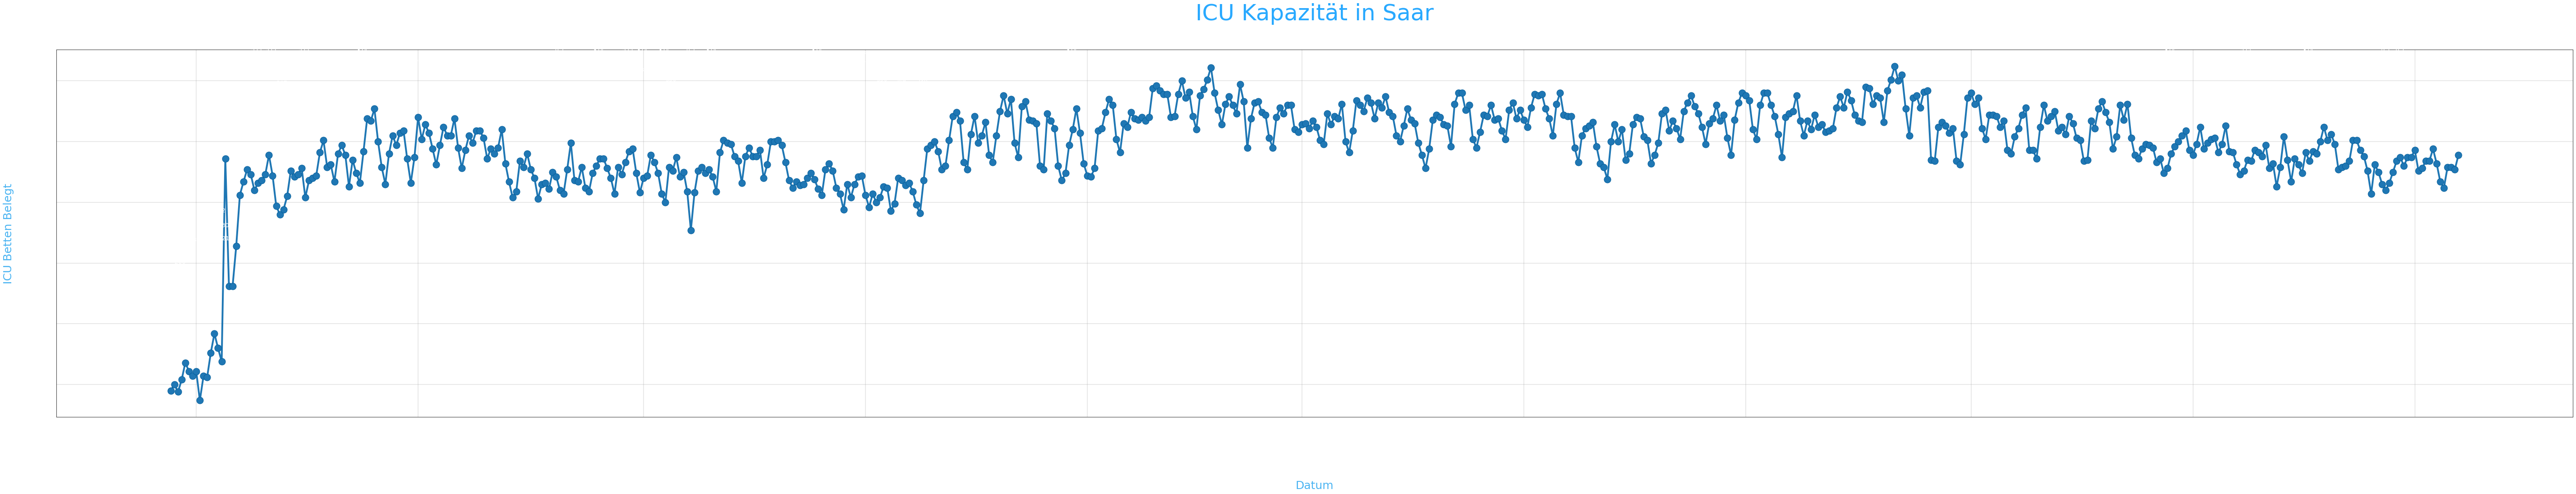

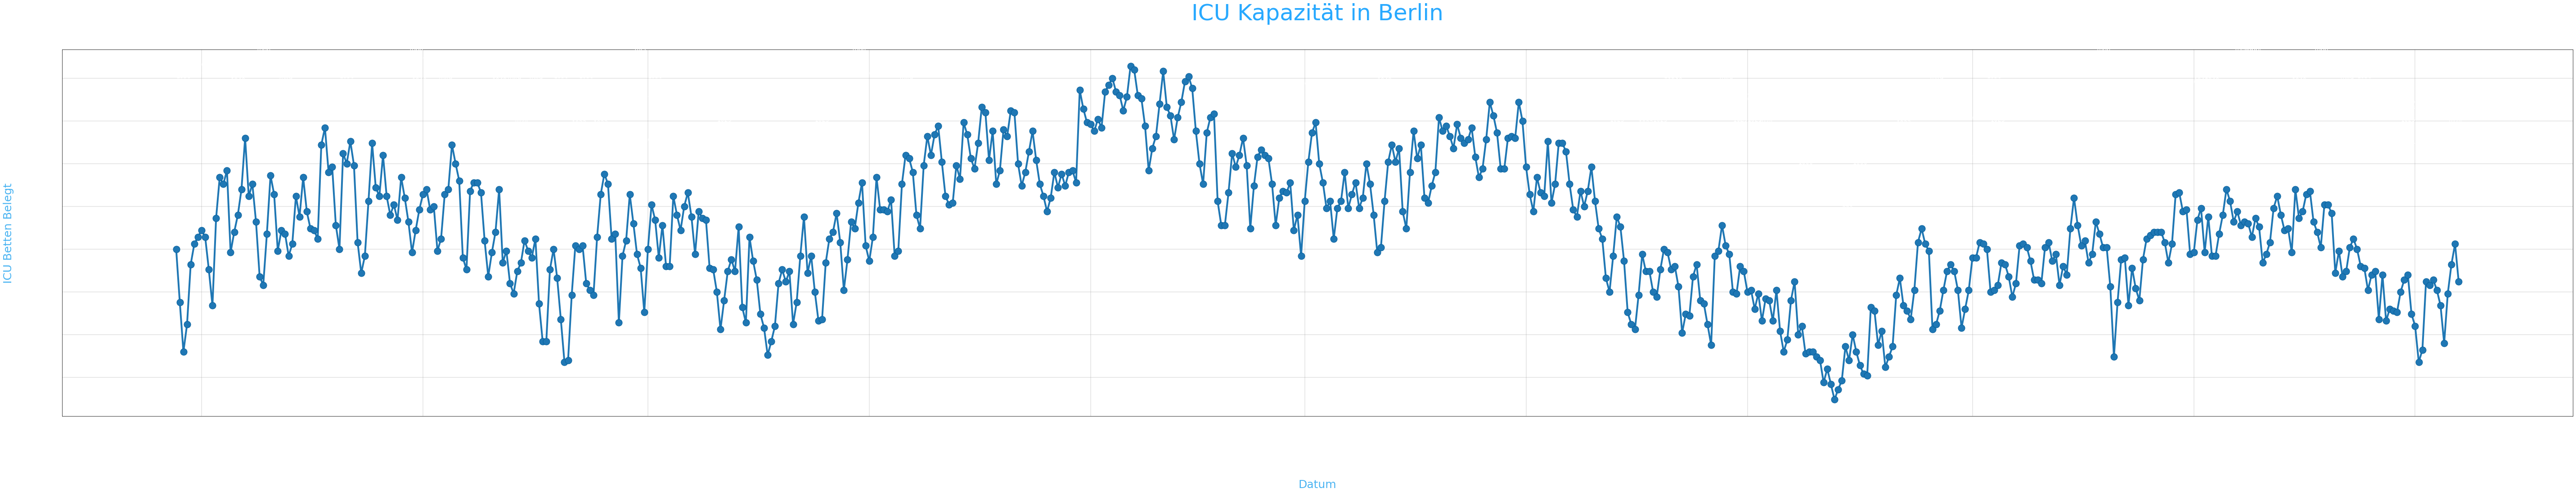

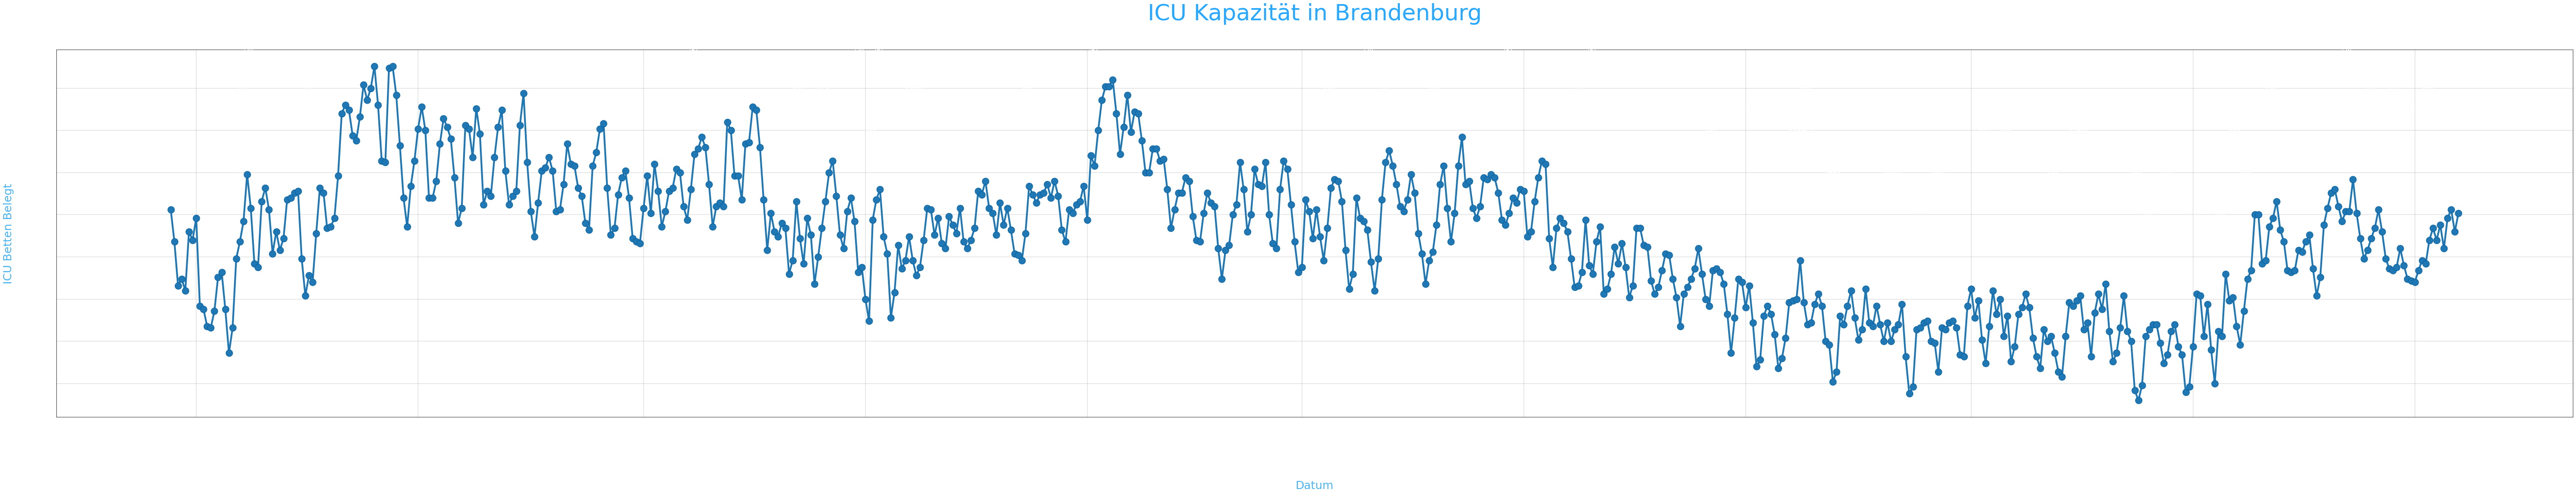

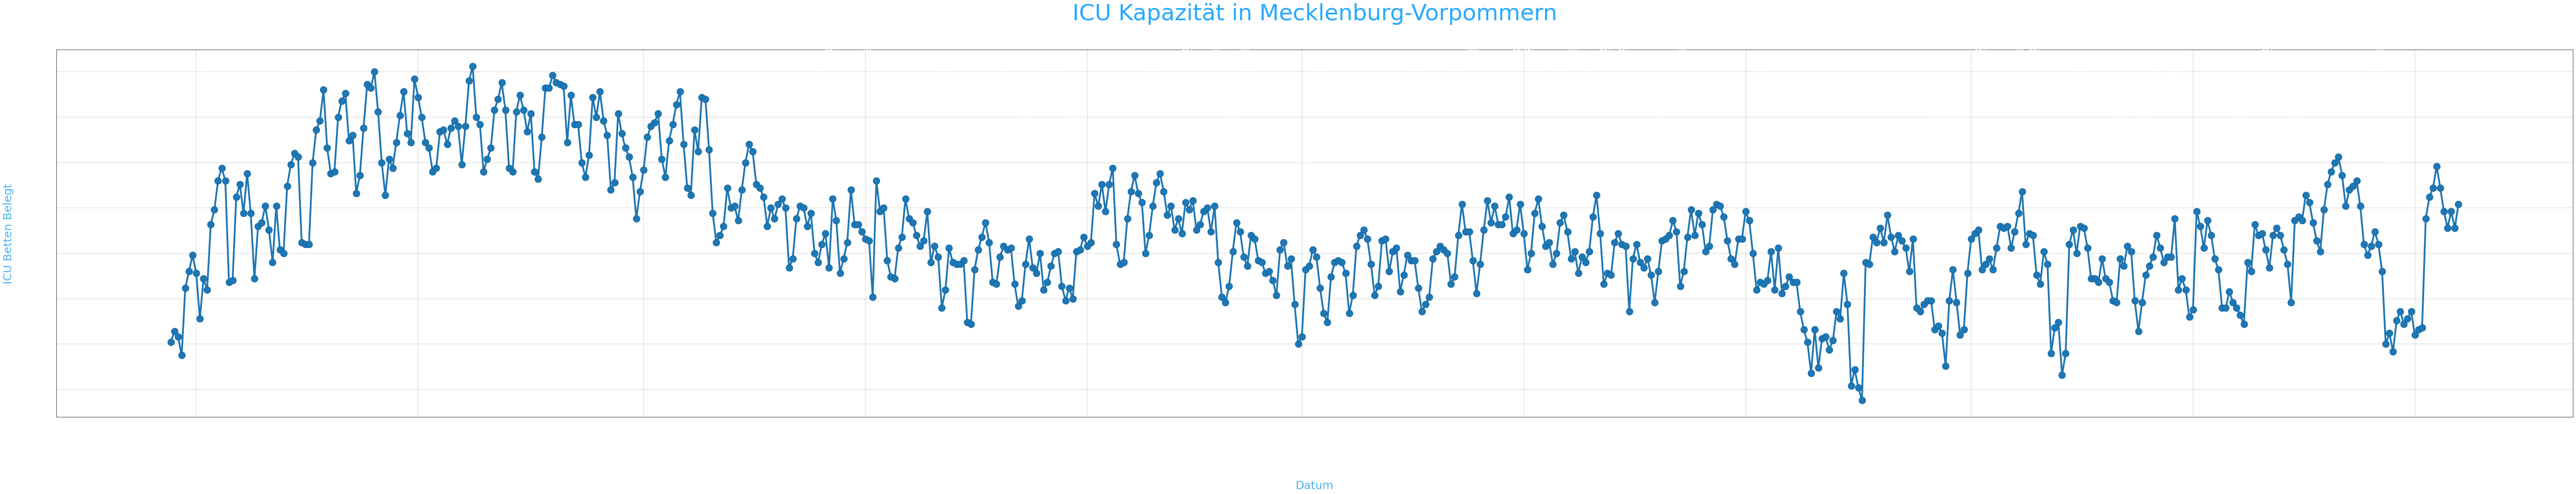

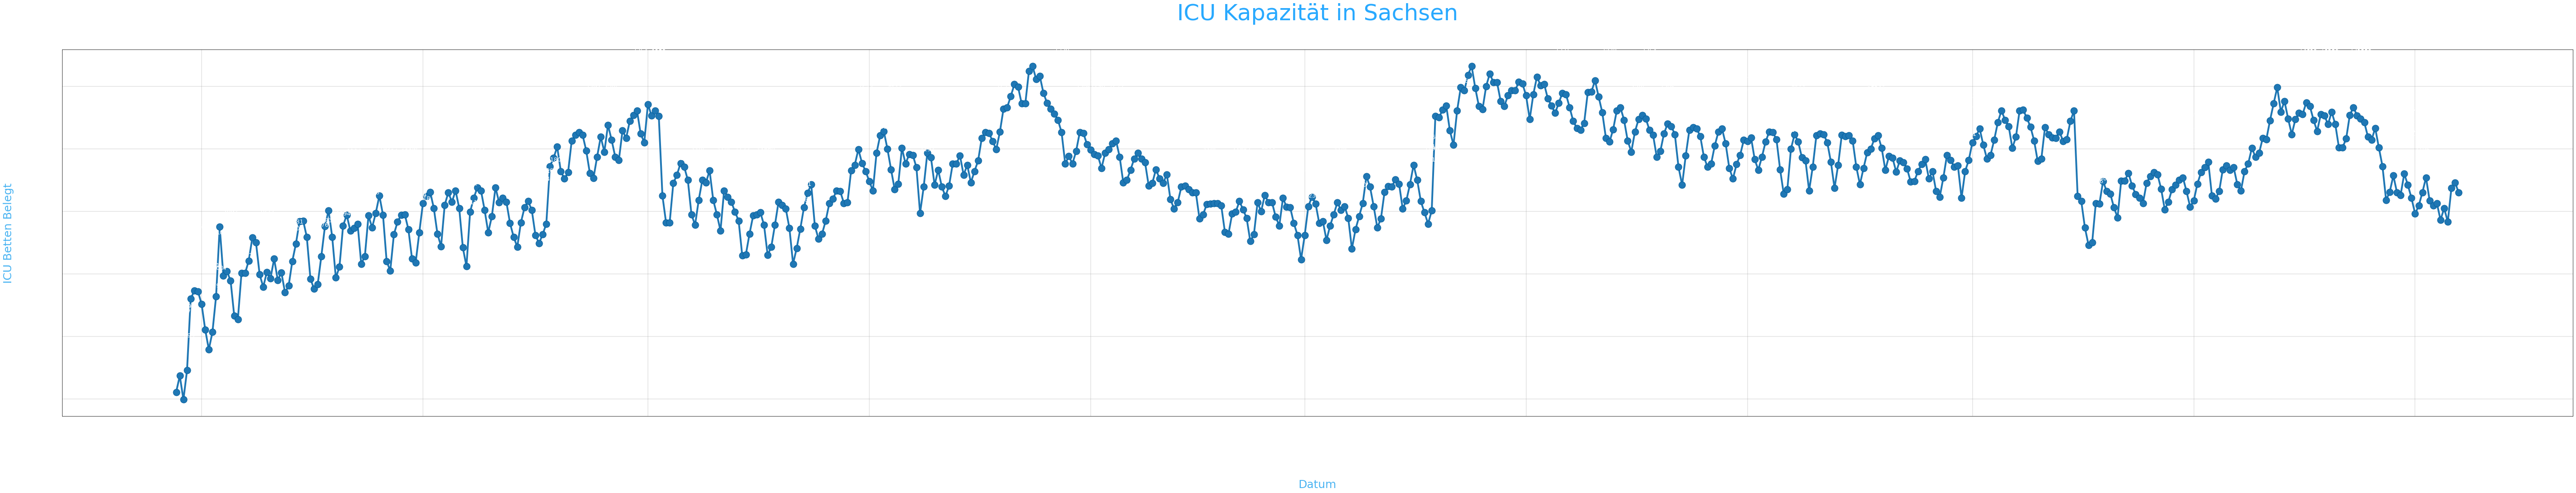

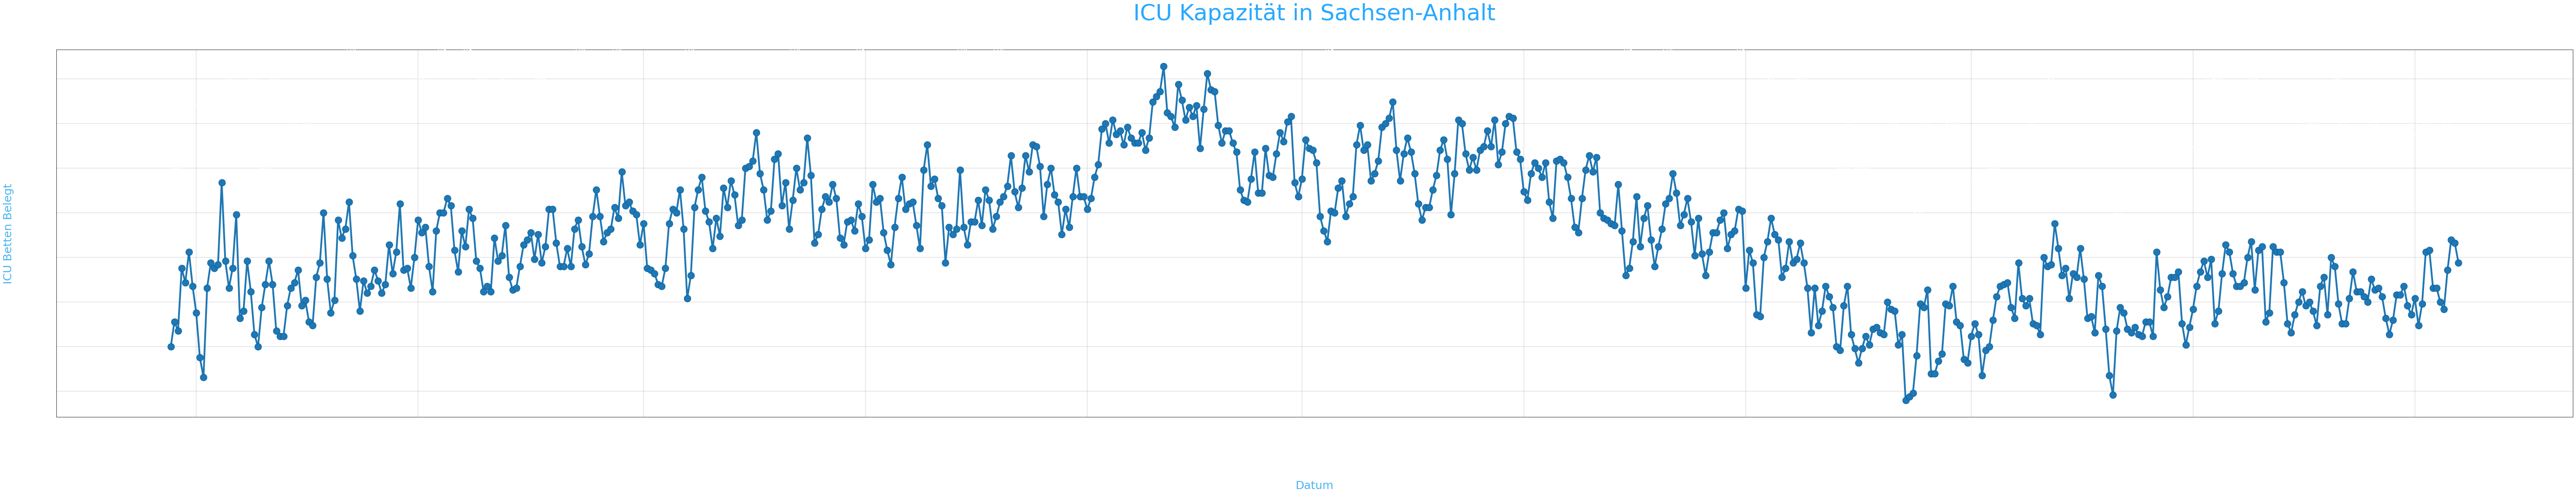

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from kreisid import landid

for x in range(1, 16):

    # Convert to Date
    plot = betten[betten['bundesland']==x]
    plot["datum"] = plot["datum"].astype("datetime64")
    plot = plot[plot['datum'] > "2020-01-01"]
    #print(plot)


    Y = plot['belegt'] 
    R = plot['frei'] 
    X = plot['datum']
    
    plt.figure(figsize=(100,15))
    
    ax = plt.axes()
    ax.grid(linewidth=0.4, color='#8f8f8f') 
    
    #ax.set_facecolor("black") 
    ax.set_xlabel('\nDatum',size=25,color='#4bb4f2')
    ax.set_ylabel('ICU Betten Belegt\n',
                size=25,color='#4bb4f2')
    
    plt.xticks(rotation='vertical',size='20',color='white')
    plt.yticks(size=20,color='white')
    plt.tick_params(size=20,color='white')
    
    for i,j in zip(X,Y):
        ax.annotate(str(j),xy=(i,j+100),color='white',size='13')
        
    plt.title("ICU Kapazität in "+landid(str(x))+"\n",
            size=50,color='#28a9ff')
    
    ax.plot(X,Y,
            color='#1F77B4',
            marker='o',
            linewidth=4,
            markersize=15,
            markeredgecolor='#035E9B')